# Neural Net Example and comparison with SVM


### Setup

In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Create data set

(-1.0, 1.0)

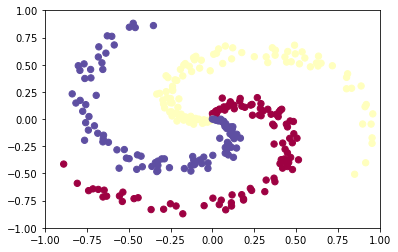

In [2]:
np.random.seed(0)

d = 2 # dimensionality
points_per_class = 100 # number of points per class
num_classes = 3 # number of classes

n = points_per_class*num_classes

X = np.zeros((n,d))
y = np.zeros(n, dtype='uint8')

for j in range(num_classes):

    inds = range(points_per_class*j, points_per_class*(j+1))

    # Generate radius and angle for each point
    r = np.linspace(0.0, 1, points_per_class) # radius
    t = np.linspace(j*4,(j+1)*4,points_per_class) + np.random.randn(points_per_class)*0.2 # theta

    X[inds] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[inds] = j  # class label

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])  

## Plotting setup

In [3]:
h = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

X_test = np.c_[xx.ravel(), yy.ravel()]

def plot_model(scores):
    # Put the result into a color plot
    Z = scores.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

## Helper Functions for Non-Linearities

First, setup some functions for non-linear functions we may use in the neural network, together with their derivatives.

In [4]:
# ReLU: "rectified linear unit" nonlinearity
def relu(z):
    return np.maximum(0, z)

# Derivative of relu wrt its input (for backprop)
def relu_prime(z):
    return 1.0*(z>0)

# Train a 2-Layer Neural Network Using Autograd

Here we will show a complete example of training a feed-forward neural network with one hidden layer using autograd. First, we need to define a multiclass loss function for our model.

### Cross-Entropy Loss Function

We would like a multiclass loss function analogous to log loss for logistic regression. First, suppose we are operating on a single input $\mathbf{x}$ with class $y$, and we have computed class scores $s_1, \ldots, s_c$ for this example for each of $c$ classes. We first transform these scores to probabilities by the following trick, known as the "softmax" transformation:

$$
p_k = \frac{\exp(s_k)}{\sum_{k'} \exp(s_{k'})}
$$

We have first exponentiated the scores to make them positive, and then normalized them to sum to one. 

Then, the appropriate generalization of log loss is for multiple classes is:

$$
J = - \sum_k \mathbb{I}\{y = k\} \log p_k
$$

Here the indicator function $\mathbb{I}\{y = k\}$ is equal to one when the true class $y$ is equal to $k$ and zero otherwise. Note that, like log loss, this simply picks out the negative log predicted probability for the correct class. This loss function is usually called the "cross-entropy" loss function, for reasons we will not dive into.

This is the loss on a single training example. Our overall loss function is an average of the cross-entropy loss over all training example:
$$
J = \frac{1}{n} \sum_{i=1}^n \Bigg(\sum_k -\mathbb{I}\{y^{(i)} = k\} \log p^{(i)}_k\Bigg)
$$

We are also regularizing the network weights to reduce variance. The complete loss is 
$$
J +\lambda \text{reg}= \frac{1}{n} \sum_{i=1}^n \Bigg(\sum_k -\mathbb{I}\{y^{(i)} = k\} \log p^{(i)}_k\Bigg) + \lambda \left(\sum_{i=1}^d \sum_{j=1}^m (W_{ij}^{[1]})^2+ \sum_{i=1}^m \sum_{j=1}^c (W_{ij}^{[2]})^2 \right )
$$

### Training and testing
To train a model with automatic differentiation, all we need to do is write a routine to perfrom gradient descent on the parameters of the network. This enteils in each iteration computing the loss, and then automatically computing the derivatives of the loss function with respect to parameters for gradient descent. In order to compute the loss you will have to execute the complete forward pass through the network. You will perform derivatives automatically using the function autograd.grad. Report the loss every 1000 iterations. 

* $X \in \mathbb{R}^{n \times d}$ is a data matrix (with feature vectors in rows),
* $W^{[1]} \in \mathbb{R}^{d \times m}$ is a matrix of weight vectors (one in each column), 
* $b^{[1]} \in \mathbb{R}^{1 \times m}$ is a row vector containing the biases/intercepts for each hidden neuron. 
* $W^{[2]} \in \mathbb{R}^{m \times c}$ is a matrix of weight vectors (one in each column), 
* $b^{[2]} \in \mathbb{R}^{1 \times c}$ is a row vector containing the biases/intercepts for each class. 

We can compute the equations for $S \in \mathbb{R}^{n \times c}$ and $Z \in \mathbb{R}^{n \times m}$ and then the regularized loss $J+\lambda \text{reg}$ from the notes. 

Once the network is trained you will predict the labels of the test set and use the function plot_model to plot such predictions. 


Iteration:  0 | Loss:  1.0987647090609558
Iteration:  1000 | Loss:  0.292278335003815
Iteration:  2000 | Loss:  0.2565879365770214
Iteration:  3000 | Loss:  0.24821728471458665
Iteration:  4000 | Loss:  0.24618247732068677
Iteration:  5000 | Loss:  0.24566682668852322
Iteration:  6000 | Loss:  0.24543788668345223
Iteration:  7000 | Loss:  0.2452797049288334
Iteration:  8000 | Loss:  0.2451735817515345
Iteration:  9000 | Loss:  0.24509452625783895
Iteration:  10000 | Loss:  0.24502853858355378


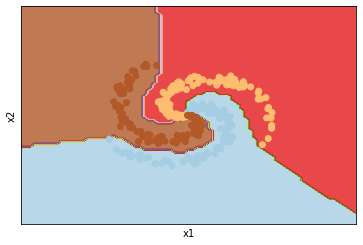

In [5]:
import autograd.numpy as np  # Thinly wrapped version of numpy
from autograd import grad
from sklearn.metrics import accuracy_score

verbose = False

m  = 100 # size of hidden layer

# initialize weights with small random values and biases with zeros
W1 = 0.01*np.random.randn(d, m)
b1 = np.zeros((1, m))
W2 = 0.01*np.random.randn(m, num_classes)
b2 = np.zeros((1, num_classes))


if verbose:
    for x in [W1, b1, W2, b2]:
        print(x)
    
# Select hyperparameters
iters      = 10001
step_size  = 1e-0
lambda_val = 1e-3 # regularization strength

'''
Do entire feed-forward computation and compute loss function
'''
def compute_loss(params):
    W1, b1, W2, b2 = params

    # Compute scores
    hidden = relu(X@W1+b1)
    scores = hidden@W2+b2
    
    # Compute probabilities
    expScores = np.exp(scores)
    probs = expScores/np.sum(expScores, axis=1, keepdims=True)
    
    # Compute cross-entropy loss    
    logprob_correct_class = -np.log(probs[range(n), y])
    data_loss = np.sum(logprob_correct_class)/n

    # Compute regularization loss
    reg_loss = 0.5 * lambda_val * (np.sum(W1*W1) + np.sum(W2*W2))
    
    return data_loss + reg_loss


# Compute the gradient (vector of partial derivatives) of the entire feedforward training using grad function 
gradient = grad(compute_loss)

# Gradient descent loop
for i in range(iters):
  
    # Print diagnostic
    loss = compute_loss((W1, b1, W2, b2))    
  
    if (i % 1000 == 0):
        print("Iteration: ", i, "| Loss: ", loss)
        
    dW1, db1, dW2, db2 = gradient((W1, b1, W2, b2))
    
    # perform a parameter update
    W1 -= step_size * dW1
    b1 -= step_size * db1
    W2 -= step_size * dW2
    b2 -= step_size * db2
    
# predict on the test set and plot predictions using plot model
def predict(X):
    scores = relu(X@W1 + b1)@W2 + b2
    prediction = np.argmax(scores, axis=1)
    return prediction

auto_preds = predict(X_test)

plot_model(auto_preds)

##  Train a 2-Layer Neural Network  Using Backprop

Now, we will perform the same training and testing procedure as above but we will code the gradient ourselves using backpropagation. 

### Derivative of Log-Loss with Respect to Scores

Let $S \in \mathbb{R}^{n \times c}$, the matrix of scores for all training points. It is possible to show that:

$$
\frac{dL}{dS_{ik}} = 
\begin{cases}
\frac{1}{n}p_k     & \text{if } y^{(i)} \neq k \\
\frac{1}{n} \left (p_k - 1 \right) & \text{if } y^{(i)} = k
\end{cases}
$$
where $y^{(i)}$ is the true label for training vector $x^{(i)}$. 

Proof can be found https://math.stackexchange.com/questions/1804041/how-to-derive-softmax-function

Computing these derivatives is the first step of backpropagation.

### Backprop through the network Using Matrix Multiplication

You will need to use the equations we established in class (last page) for the derivatives of the loss function with respect to the parameters of the network and use them in place of the automatic derivatives in the gradient descent updates. 


Compare the loss every 1000 iterations and visually compare the prediction map with the ones computed above. What is your expectation?


Iteration:  0 | Loss:  1.0986154516274362
Iteration:  1000 | Loss:  0.29493967299500784
Iteration:  2000 | Loss:  0.25924257345067625
Iteration:  3000 | Loss:  0.25549003250183727
Iteration:  4000 | Loss:  0.25227687464396814
Iteration:  5000 | Loss:  0.25237142749423785
Iteration:  6000 | Loss:  0.25044806654357926
Iteration:  7000 | Loss:  0.24858879424848063
Iteration:  8000 | Loss:  0.24820583576930658
Iteration:  9000 | Loss:  0.24843709120151386
Iteration:  10000 | Loss:  0.2481788948179699


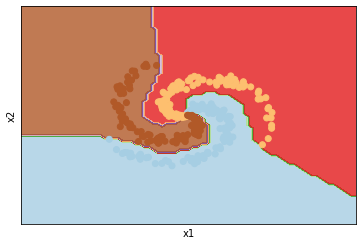

In [7]:
# Initialize parameters as before

m  = 100 # size of hidden layer
W1 = 0.01*np.random.randn(d, m)
b1 = np.zeros((1, m))
W2 = 0.01*np.random.randn(m, num_classes)
b2 = np.zeros((1, num_classes))


# Select hyperparameters as before
iters      = 10001
step_size  = 1e-0
lambda_val = 1e-3 # regularization strength

# Gradient descent loop
for i in range(iters):

    '''
    FORWARD PROPAGATION
    ''' 

    # Compute class scores
    hidden_layer = relu(X@W1 + b1)
    scores = hidden_layer@W2 + b2
    
    # Compute class probabilities
    expScores = np.exp(scores)
    classProbs = expScores / np.sum(expScores, axis=1, keepdims=True)
    if verbose:
        print(classProbs)
    
    # Compute the loss function
    dataLoss = np.sum(-np.log(classProbs[range(n),y]))/n  # cross-entropy
    regLoss = 0.5 * lambda_val * (np.sum(W1*W1) + np.sum(W2*W2))
    loss = dataLoss + regLoss      

    if (i % 1000 == 0):
        print("Iteration: ", i, "| Loss: ", loss)

    ''' 
    BACKWARD PROPAGATION
    '''

    # Compute gradient of cross-entropy wrt class scores
    dscores = classProbs
    dscores[range(n),y] -= 1
    dscores /= n

    # Now backpropagate to get gradient of cross-entropy wrt parameters (W2,b2)
    # and hidden layer outputs 
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0)
    dhidden = np.dot(dscores, W2.T)
    
    # Backprop through the nonlinearity
    dhidden = dhidden * relu_prime(hidden_layer)
    
    # Backprop to (W1,b1)
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden, axis=0)

    # Add regularization gradient contribution
    dW2 += lambda_val * W2
    dW1 += lambda_val * W1
   

    '''
    UPDATE PARAMETERS
    '''

     # perform a parameter update
    W1 -= step_size * dW1
    b1 -= step_size * db1
    W2 -= step_size * dW2
    b2 -= step_size * db2
    
# predict and plot as before

backprop_preds = predict(X_test)
plot_model(backprop_preds)


MY Expectation:
I expect that backprop would create a better classifier because it has less loss at greater iterations. Further, backprop makes a better classifier the more iterations that are used because early on in the iterations the autograd trained classifier has a greater loss deprecation rate. 

Regardless of the model used the classifier appears to be accurate seperating the respective clusters by their colors. 

# Train Multi-Class SVC with RBF kernel 

Use the same data to train a 3-class SVM with RBF kernel. Visually compare the prediction map on the test set obtained with plot_model. You can cross_validate over the complexity parameters of the SVM. Are you expecting the SVM to perform similarly to the NN? Why or why not?

0.87


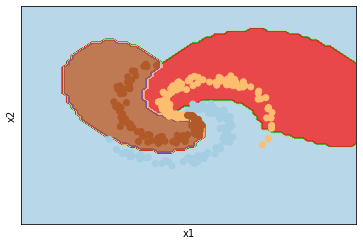

In [8]:
from sklearn import svm
import sklearn.model_selection as model_selection
#from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=1, decision_function_shape='ovo')
rbf.fit(X,y)

rbf_pred = rbf.predict(X_test)

rbf_accuracy = rbf.score(X, y)
print(rbf_accuracy)
plot_model(rbf_pred)

I am not expecting the SVM to perform similarly to the Neural Network because from the plots you can see that the SVM does not classify as effectively as the neural network. There are clearly data points outside their respective classifications, whereas in the neural network example the plotted charts encompass all data within their classification. Further mroe there are equal amounts of data points of each color which should correlate to roughly uniform distribution of classification, but the blue classification is much more prevalent in the SVM chart. 

Further, in an ideal scenario a neural network will be return a greater accuracy score with more training data. This is not necessarily true for the SVM as it is more likely to result in overfitting. 